In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('application_record.csv')

In [26]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


**A scatterplot which attempts to show the relationship between the days employed versus the age of the person (DAYS_BIRTH) for people who were not unemployed:**

/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_5466/2559124282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_EMPLOYED'] = -1 * employed['DAYS_EMPLOYED']
/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_5466/2559124282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_BIRTH'] = -1 * employed['DAYS_BIRTH']


<Axes: xlabel='DAYS_EMPLOYED', ylabel='DAYS_BIRTH'>

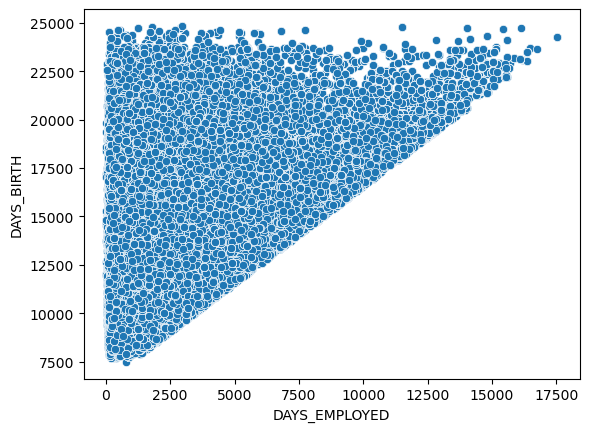

In [27]:
employed = df[df['DAYS_EMPLOYED']<0]
employed['DAYS_EMPLOYED'] = -1 * employed['DAYS_EMPLOYED']
employed['DAYS_BIRTH'] = -1 * employed['DAYS_BIRTH']
sns.scatterplot(data = employed, x = 'DAYS_EMPLOYED', y = 'DAYS_BIRTH')


**How to calculate "Age in Years"**

<Axes: xlabel='Age_in_Years', ylabel='Count'>

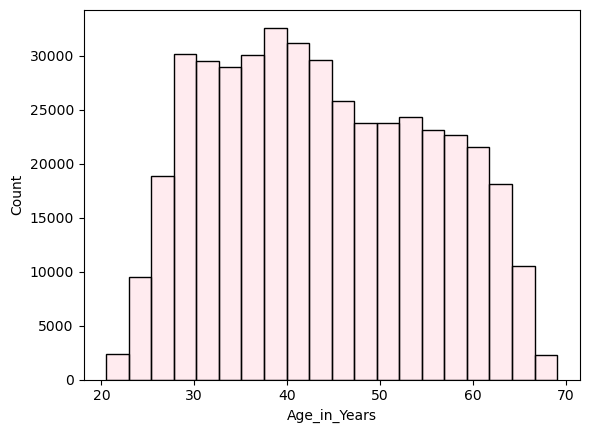

In [28]:
df['Age_in_Years'] = -1*df['DAYS_BIRTH']/365
sns.histplot(data = df , x = 'Age_in_Years',linewidth=1 ,edgecolor='black',
             color='pink',bins=20,alpha=0.3)

**This plot shows information only for the bottom half of income earners in the data set. It shows the boxplots for each category of NAME_FAMILY_STATUS column for displaying their distribution of their total income:**

Text(0.5, 1.0, 'Income Totals per Family Status for Bottom Half of Earners')

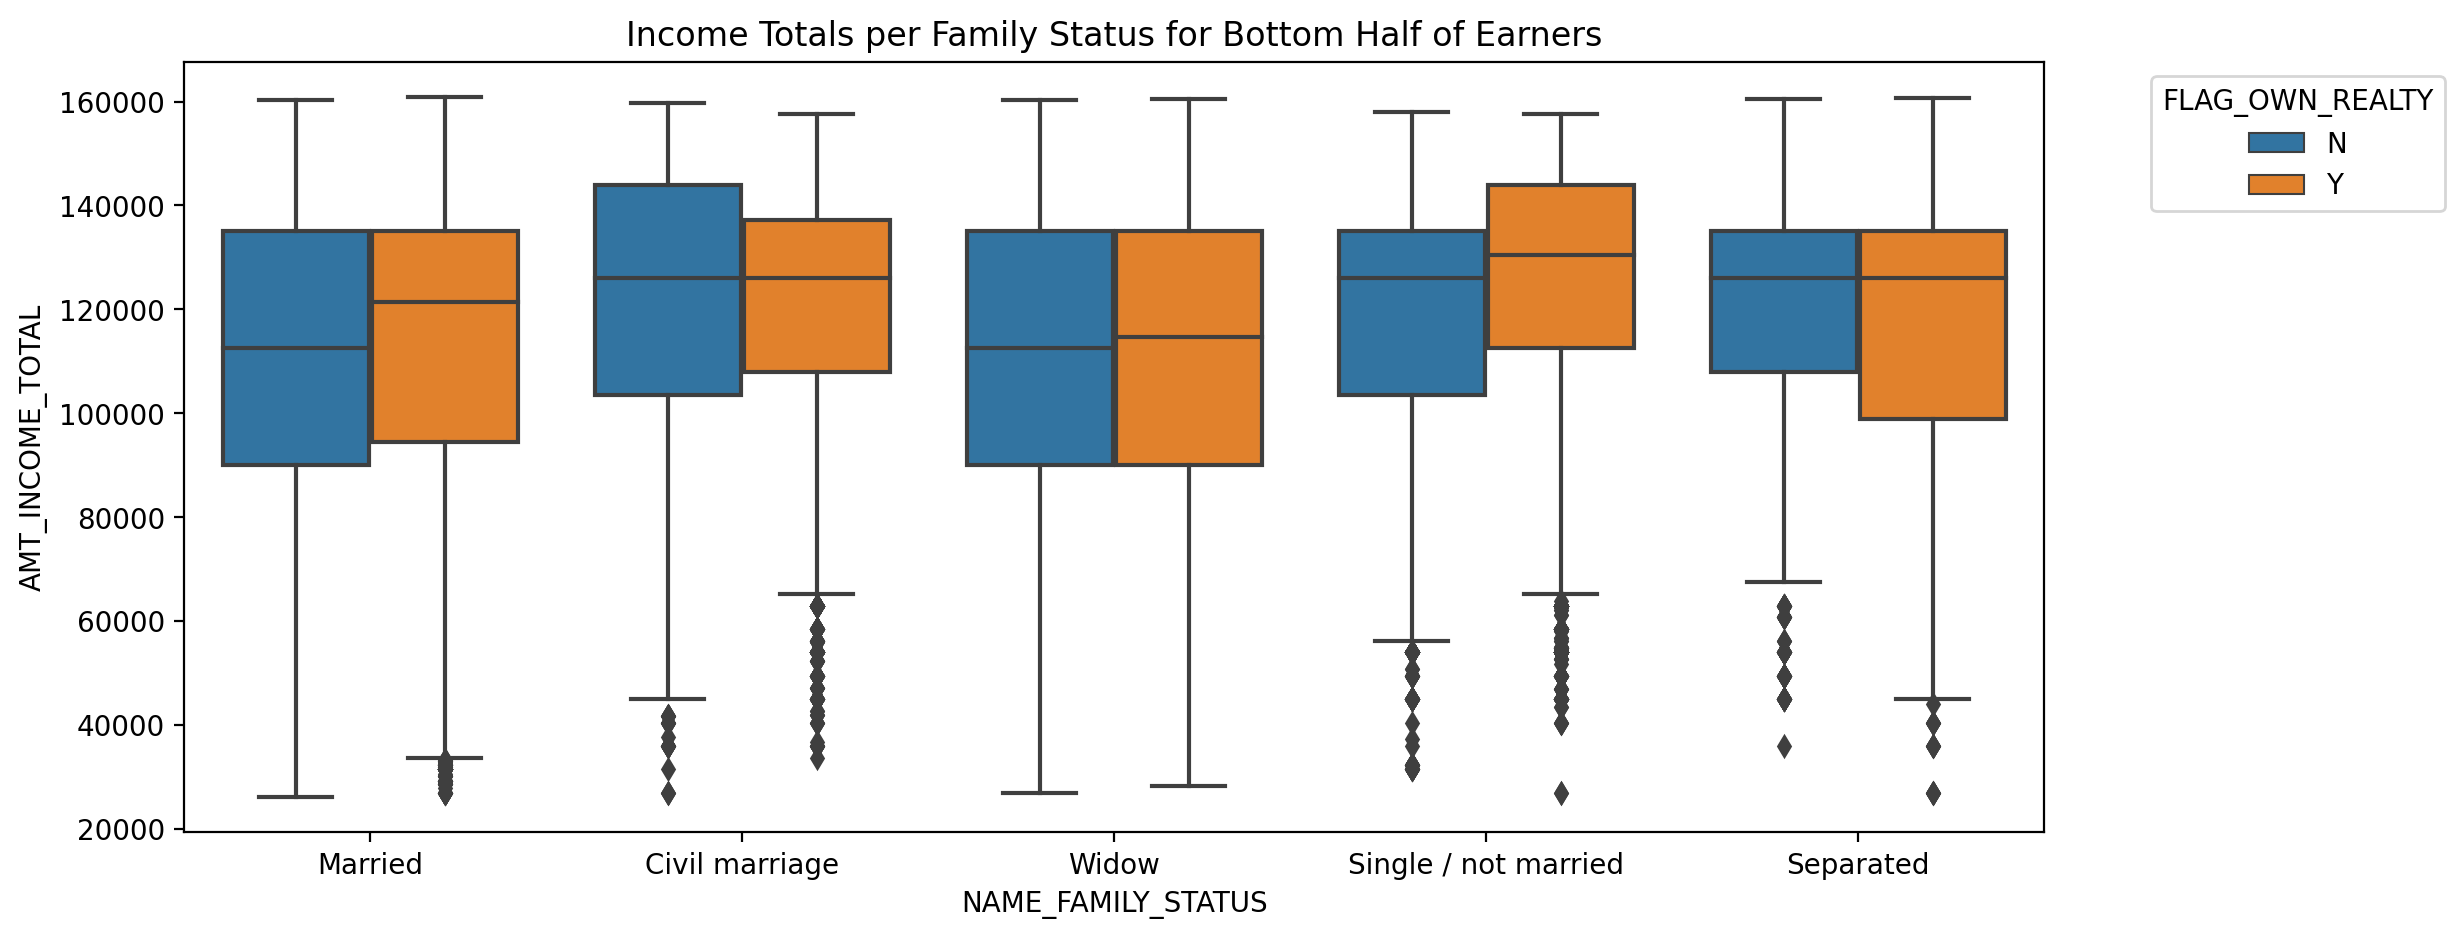

In [29]:
plt.figure(figsize=(12,5),dpi = 200)
bottom_half_income = df.nsmallest(n=int(0.5*len(df)),columns='AMT_INCOME_TOTAL')
sns.boxplot(data = bottom_half_income, x = 'NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL',hue='FLAG_OWN_REALTY')
plt.legend(bbox_to_anchor=(1.05, 1),title='FLAG_OWN_REALTY')
plt.title('Income Totals per Family Status for Bottom Half of Earners')

**Heat Map**

In [33]:
df.corr()

/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_5466/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Age_in_Years
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,-0.306179


/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_5466/3741013985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr(),cmap="viridis",annot = True)


<Axes: >

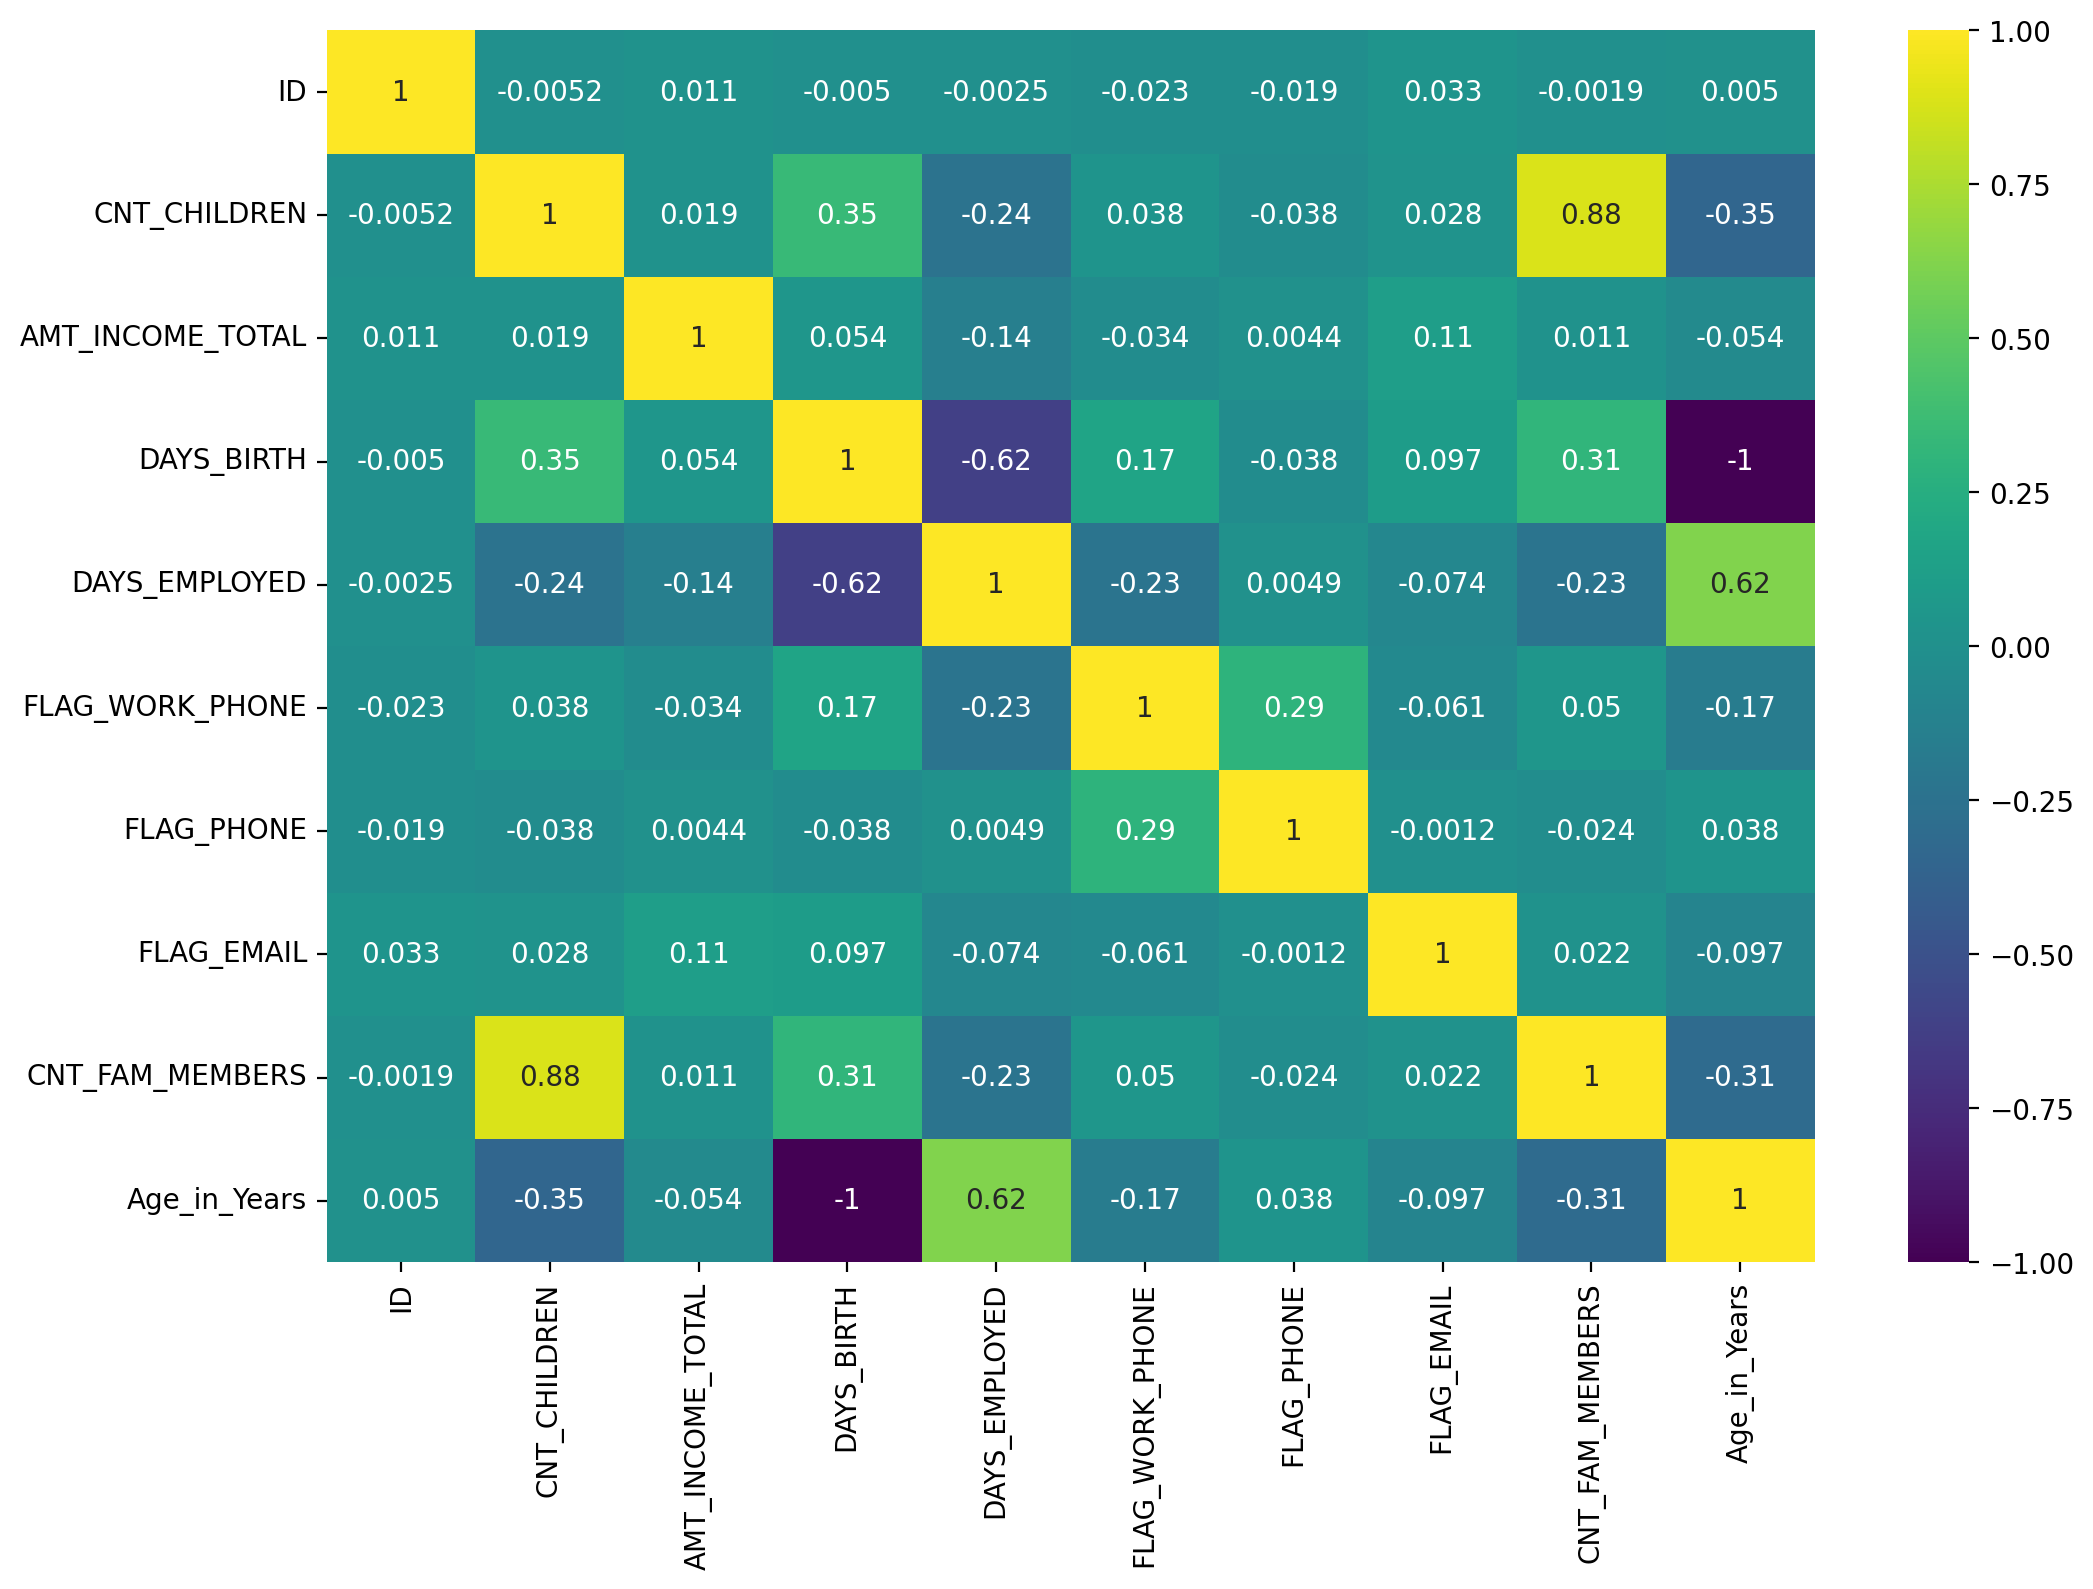

In [32]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr(),cmap="viridis",annot = True)